# Data exploration

Marcos Duarte

In [1]:
import numpy as np
import pandas as pd
from scipy import stats 
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#sns.set()
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2, "lines.markersize": 10})

In [2]:
df = pd.read_excel('RFAdata.xlsx', parse_cols=9)
df.drop_duplicates(subset='Subject', inplace = True)
del df['Subject']
df.groupby('Gender').count()

,Age,Mass,Height,Speed,RFAbR,RFAbL,RFAsR,RFAsL
Gender,,,,,,,,
F,43,43,43,43,43,43,42,42
M,93,93,93,93,93,93,93,93


In [3]:
df.describe()

,Age,Mass,Height,Speed,RFAbR,RFAbL,RFAsR,RFAsL
count,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,135.000000,135.000000
mean,38.382353,73.155147,1.734412,9.508824,7.426471,7.893382,11.937037,12.248148
std,9.500143,12.532073,0.082298,1.219379,3.288324,3.707554,4.246346,4.311506
min,15.000000,46.000000,1.540000,7.000000,1.000000,1.000000,2.000000,2.500000
25%,33.000000,63.000000,1.677500,8.500000,5.000000,5.500000,9.250000,9.000000
50%,38.000000,73.000000,1.740000,10.000000,7.000000,8.000000,12.000000,13.000000
75%,44.000000,81.250000,1.800000,10.000000,9.000000,10.000000,15.000000,15.000000
max,70.000000,108.000000,1.960000,13.000000,18.000000,22.000000,22.000000,22.000000


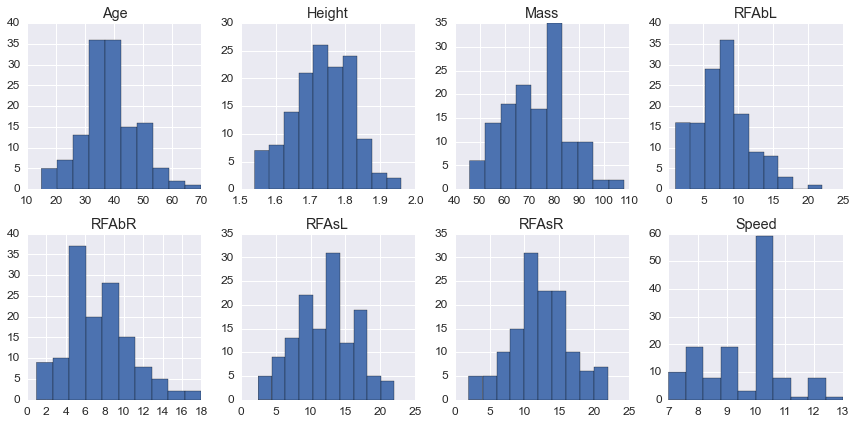

In [4]:
df.hist(figsize=(12, 6), layout=(2, 4))
plt.tight_layout()

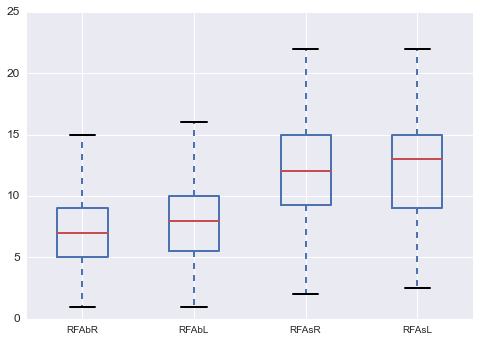

In [5]:
df.ix[:, [5,6,7,8]].boxplot(return_type='axes');

In [6]:
normality = np.empty((df.shape[1]-1, 2))
for c in range(df.shape[1]-1):
    normality[c, :] = stats.shapiro(df.ix[:, c+1])  # Shapiro-Wilk's test
    if normality[c, 1] < 0.05:
        print('Variable %s is not normal: p=%f' %(df.columns[c+1], normality[c, 1]))

Variable Speed is not normal: p=0.000002
Variable RFAbR is not normal: p=0.012998
Variable RFAbL is not normal: p=0.007142


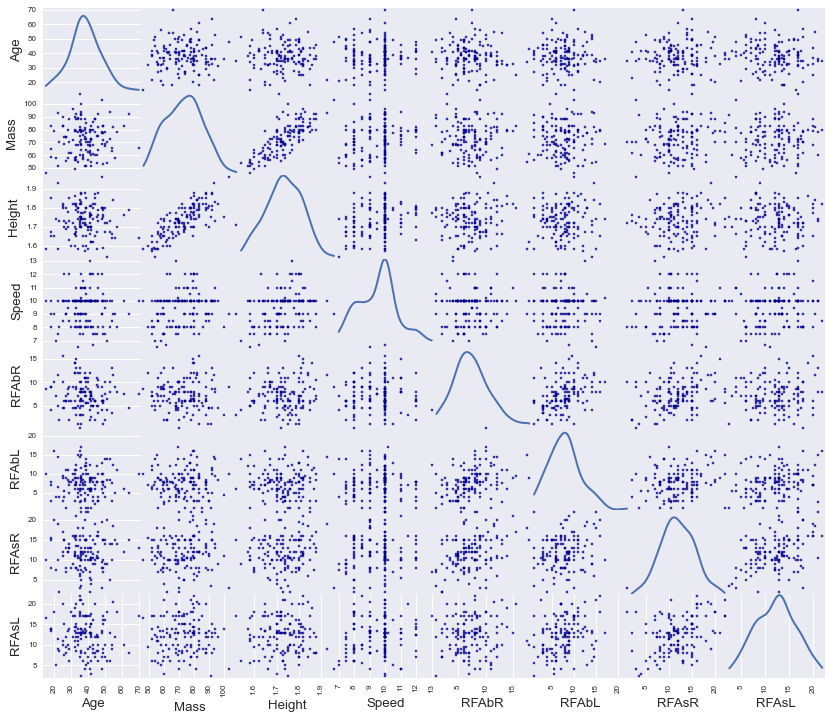

In [7]:
scatter_matrix(df, alpha=0.8, figsize=(14, 12), color='DarkBlue', diagonal='kde');

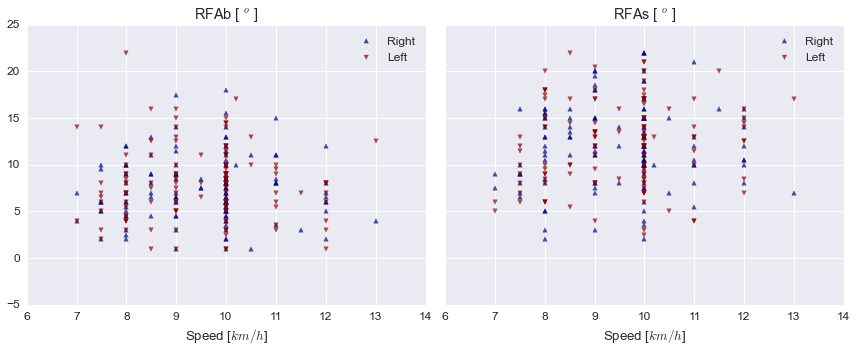

In [8]:
hfig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, squeeze=True, figsize=(12, 5))
df.plot(kind='scatter', x='Speed', y='RFAbR', color='DarkBlue', marker='^', alpha=.7, label='Right', ax=ax1)
df.plot(kind='scatter', x='Speed', y='RFAbL', color='DarkRed', marker='v', alpha=.7, label='Left', ax=ax1)
ax1.set_title('RFAb [$\,^o$]'); ax1.set_xlabel('Speed [$km/h$]'); ax1.set_ylabel('')
df.plot(kind='scatter', x='Speed', y='RFAsR', color='DarkBlue', marker='^', alpha=.7, label='Right', ax=ax2)
df.plot(kind='scatter', x='Speed', y='RFAsL', color='DarkRed', marker='v', alpha=.7, label='Left', ax=ax2)
ax2.set_title('RFAs [$\,^o$]'); ax2.set_xlabel('Speed [$km/h$]'); ax2.set_ylabel('')
plt.tight_layout()

## Data exploration only for speeds between 9 and 11 km/h

In [9]:
df = df[(df['Speed'] >=9) & (df['Speed'] <=11)]
df.groupby('Gender').count()

,Age,Mass,Height,Speed,RFAbR,RFAbL,RFAsR,RFAsL
Gender,,,,,,,,
F,22,22,22,22,22,22,22,22
M,67,67,67,67,67,67,67,67


In [10]:
df.describe()

,Age,Mass,Height,Speed,RFAbR,RFAbL,RFAsR,RFAsL
count,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000
mean,38.348315,74.989888,1.746517,9.873034,7.741573,8.230337,12.320225,12.387640
std,9.808509,12.654949,0.081032,0.552425,3.466653,3.499234,4.446811,4.182453
min,15.000000,46.000000,1.570000,9.000000,1.000000,1.000000,2.000000,2.500000
25%,33.000000,67.000000,1.700000,10.000000,5.500000,6.000000,10.000000,9.500000
50%,37.000000,75.000000,1.740000,10.000000,7.500000,8.500000,12.000000,13.000000
75%,44.000000,83.000000,1.800000,10.000000,9.000000,10.000000,15.000000,15.000000
max,70.000000,108.000000,1.960000,11.000000,18.000000,17.000000,22.000000,21.000000


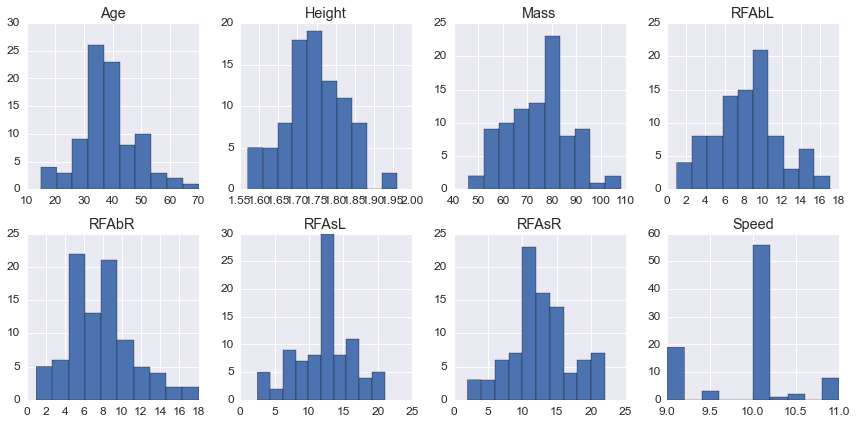

In [11]:
df.hist(figsize=(12, 6), layout=(2, 4))
plt.tight_layout()

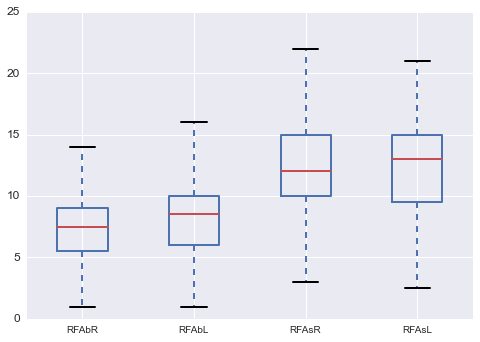

In [12]:
df.ix[:, [5,6,7,8]].boxplot(return_type='axes');

In [13]:
normality = np.empty((df.shape[1]-1, 2))
for c in range(df.shape[1]-1):
    normality[c, :] = stats.shapiro(df.ix[:, c+1])  # Shapiro-Wilk's test
    if normality[c, 1] < 0.05:
        print('Variable %s is not normal: p=%f' %(df.columns[c+1], normality[c, 1]))

Variable Speed is not normal: p=0.000000
Variable RFAbR is not normal: p=0.039227


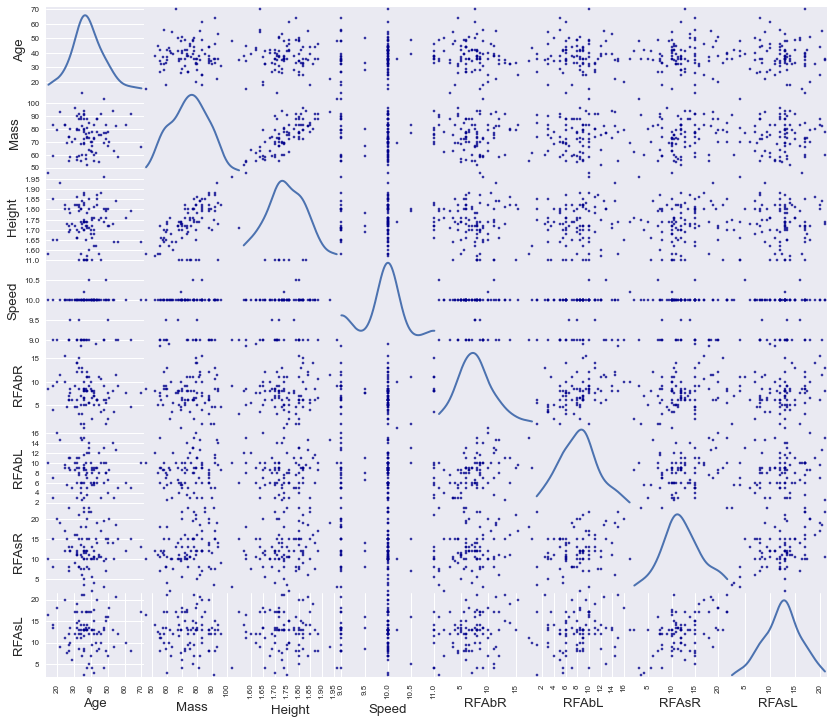

In [14]:
scatter_matrix(df, alpha=0.8, figsize=(14, 12), color='DarkBlue', diagonal='kde');

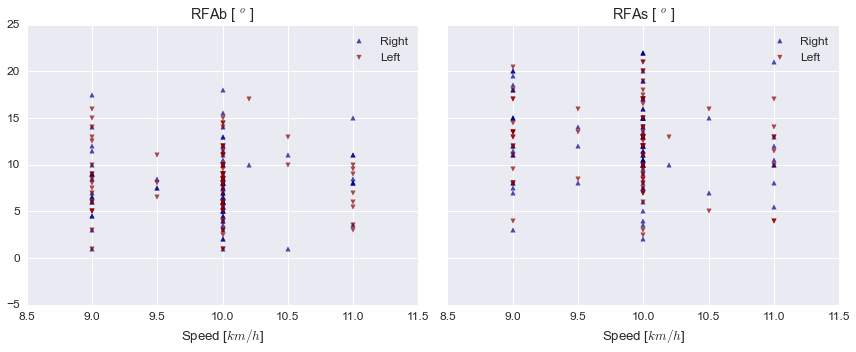

In [15]:
hfig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, squeeze=True, figsize=(12, 5))
df.plot(kind='scatter', x='Speed', y='RFAbR', color='DarkBlue', marker='^', alpha=.7, label='Right', ax=ax1)
df.plot(kind='scatter', x='Speed', y='RFAbL', color='DarkRed', marker='v', alpha=.7, label='Left', ax=ax1)
ax1.set_title('RFAb [$\,^o$]'); ax1.set_xlabel('Speed [$km/h$]'); ax1.set_ylabel('')
df.plot(kind='scatter', x='Speed', y='RFAsR', color='DarkBlue', marker='^', alpha=.7, label='Right', ax=ax2)
df.plot(kind='scatter', x='Speed', y='RFAsL', color='DarkRed', marker='v', alpha=.7, label='Left', ax=ax2)
ax2.set_title('RFAs [$\,^o$]'); ax2.set_xlabel('Speed [$km/h$]'); ax2.set_ylabel('')
plt.tight_layout()